# Simple and Multiple Linear Regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/applied_research_methods/Week_07


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("./Data/apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the simple linear regression model

In [4]:
# Add constant to the model
X_train_const = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Get the slope and intercept
intercept, slope = model.params

# Get the confidence intervals
conf = model.conf_int()

# Get R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope

# Print results of the regression model
print('Linear regression result:')
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"Confidence Interval for Slope: {conf.iloc[1].values}")
print(f"Confidence Interval for Intercept: {conf.iloc[0].values}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")


Linear regression result:
Slope: 13.5481
Intercept: 1272.94
Confidence Interval for Slope: [12.09315846 15.00306028]
Confidence Interval for Intercept: [1135.4218772  1410.46346142]
R-squared: 0.3678
P-value: 0.0000


### Plot regression line

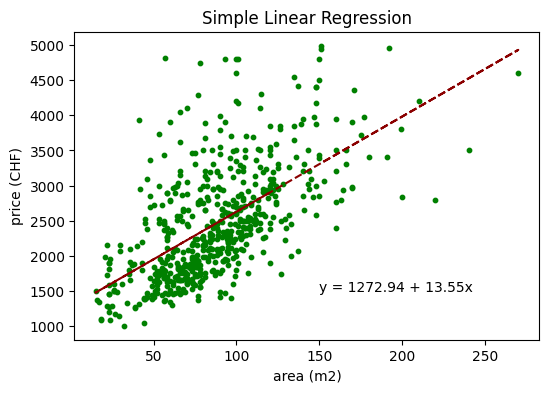

In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

# Add regression equation
plt.text(150, 
         1500, 
         f"y = {intercept:.2f} + {slope:.2f}x", 
         color='black', 
         fontsize=10)

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [6]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


### Plot histogram of residuals

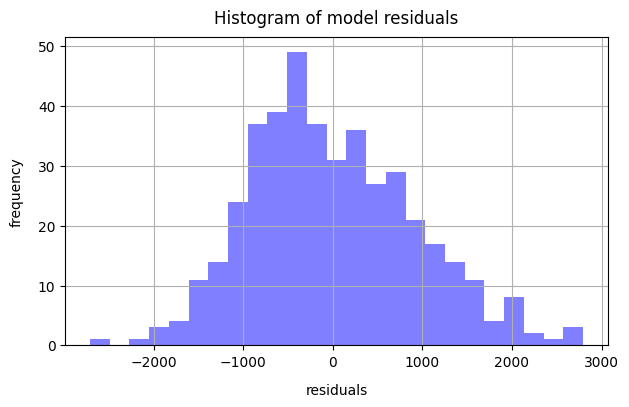

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 2031.6
Observed price: 1640.0, Predicted price: 2004.5
Observed price: 1568.0, Predicted price: 2167.1
Observed price: 2290.0, Predicted price: 2207.8
Observed price: 4950.0, Predicted price: 2627.8
Observed price: 1787.0, Predicted price: 2248.4
Observed price: 3495.0, Predicted price: 2519.4
Observed price: 2450.0, Predicted price: 2031.6
Observed price: 3390.0, Predicted price: 2871.6
Observed price: 2836.0, Predicted price: 2573.6


### Aufgabe 1a

In [9]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    15.83
6      28.46
400    23.22
644    33.37
484    19.78
Name: price_per_m2, dtype: float64


### Fit the linear regression model

In [10]:
# Add constant to the model
X_train_const = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Get the slope and intercept
intercept, slope = model.params

# Get the confidence intervals
conf = model.conf_int()

# Get R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope

# Print results of the regression model
print('Linear regression result:')
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"Confidence Interval for Slope: {conf.iloc[1].values}")
print(f"Confidence Interval for Intercept: {conf.iloc[0].values}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")


Linear regression result:
Slope: -0.2265
Intercept: 51.24
Confidence Interval for Slope: [-0.25153761 -0.20152443]
Confidence Interval for Intercept: [48.87468211 53.60188843]
R-squared: 0.3551
P-value: 0.0000


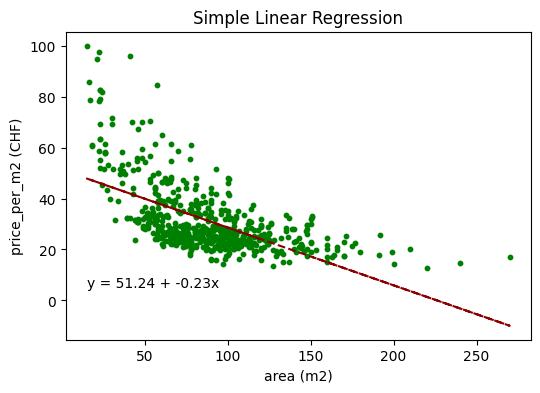

In [11]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price_per_m2 (CHF)')

# Add regression equation
plt.text(15, 
         5, 
         f"y = {intercept:.2f} + {slope:.2f}x", 
         color='black', 
         fontsize=10)

plt.show()

In [12]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 24.05
1st Observed price in dataset: 29.41
1st Residual price in dataset: 5.36


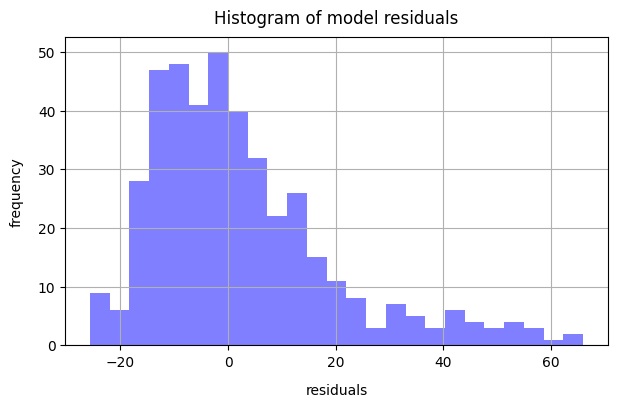

In [13]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

residuals are not normally distributed, indicating that the the values need to be linearized.
r2 is just 1% lower with price per m2 in comparison to price

In [14]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 24.3, Predicted price: 38.6
Observed price: 30.4, Predicted price: 39.0
Observed price: 23.8, Predicted price: 36.3
Observed price: 33.2, Predicted price: 35.6
Observed price: 49.5, Predicted price: 28.6
Observed price: 24.8, Predicted price: 34.9
Observed price: 38.0, Predicted price: 30.4
Observed price: 43.8, Predicted price: 38.6
Observed price: 28.7, Predicted price: 24.5
Observed price: 29.5, Predicted price: 29.5


### Aufgabe 1b

In [15]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['rooms'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    6.5
6      3.5
400    3.5
644    2.5
484    3.5
Name: rooms, dtype: float64 

y_train:
503    15.83
6      28.46
400    23.22
644    33.37
484    19.78
Name: price_per_m2, dtype: float64


In [16]:
# Add constant to the model
X_train_const = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Get the slope and intercept
intercept, slope = model.params

# Get the confidence intervals
conf = model.conf_int()

# Get R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the slope

# Print results of the regression model
print('Linear regression result:')
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"Confidence Interval for Slope: {conf.iloc[1].values}")
print(f"Confidence Interval for Intercept: {conf.iloc[0].values}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")

Linear regression result:
Slope: -6.2817
Intercept: 52.96
Confidence Interval for Slope: [-7.04647777 -5.51687599]
Confidence Interval for Intercept: [50.17743977 55.73807796]
R-squared: 0.3116
P-value: 0.0000


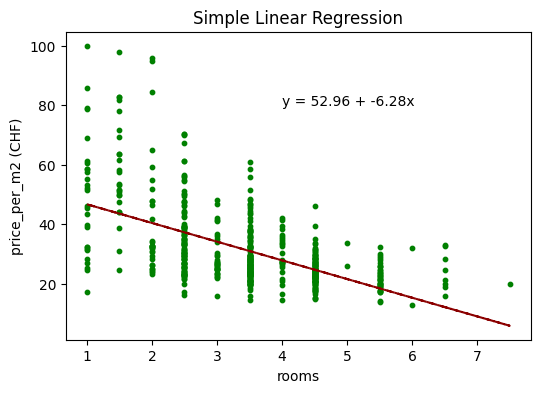

In [17]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('rooms')
plt.ylabel('price_per_m2 (CHF)')

# Add regression equation
plt.text(4, 
         80, 
         f"y = {intercept:.2f} + {slope:.2f}x", 
         color='black', 
         fontsize=10)

plt.show()

In [18]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 12.13
1st Observed price in dataset: 29.41
1st Residual price in dataset: 17.28


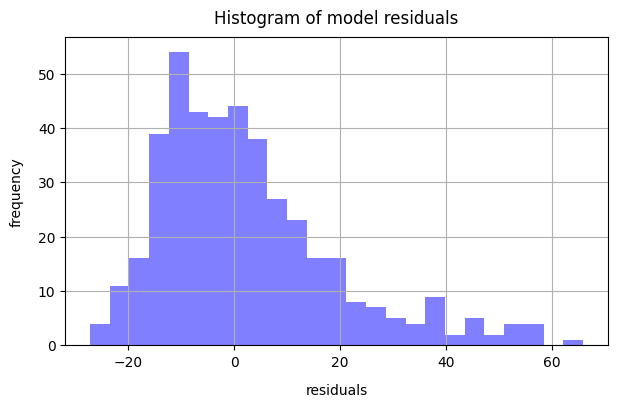

In [19]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

In [20]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 24.3, Predicted price: 40.4
Observed price: 30.4, Predicted price: 34.1
Observed price: 23.8, Predicted price: 31.0
Observed price: 33.2, Predicted price: 37.3
Observed price: 49.5, Predicted price: 31.0
Observed price: 24.8, Predicted price: 37.3
Observed price: 38.0, Predicted price: 27.8
Observed price: 43.8, Predicted price: 37.3
Observed price: 28.7, Predicted price: 24.7
Observed price: 29.5, Predicted price: 31.0


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [21]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [22]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     337.2
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.40e-97
Time:                        15:46:57   Log-Likelihood:                -2101.3
No. Observations:                 577   AIC:                             4209.
Df Residuals:                     574   BIC:                             4222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5353      1.403     26.035      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

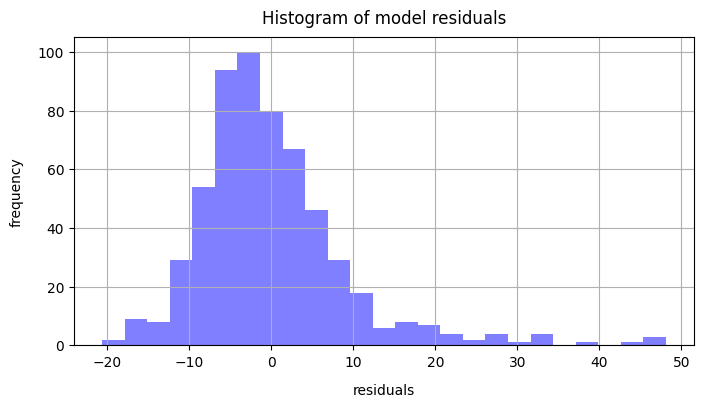

In [23]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()
plt.show()

### Compare the observed prices with the predicted prices

In [24]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 24.3, Predicted price: 33.8
Observed price: 30.4, Predicted price: 32.7
Observed price: 23.8, Predicted price: 30.7
Observed price: 33.2, Predicted price: 43.4
Observed price: 49.5, Predicted price: 26.9
Observed price: 24.8, Predicted price: 34.2
Observed price: 38.0, Predicted price: 39.7
Observed price: 43.8, Predicted price: 45.4
Observed price: 28.7, Predicted price: 21.6
Observed price: 29.5, Predicted price: 26.9


### Aufgabe 1d

In [25]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['mean_taxable_income',
                                                            'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     mean_taxable_income  dist_supermarket
503          65380.98802       1958.318650
6           111422.35870        282.095910
400          72133.75058       2606.231069
644          70964.08794        564.607066
484          62000.54187        646.823905 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


In [26]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     27.34
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.54e-12
Time:                        15:46:58   Log-Likelihood:                -2299.2
No. Observations:                 577   AIC:                             4604.
Df Residuals:                     574   BIC:                             4617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.7134    

the p value indicates, that the variables are significant in explaining the target value. But one has to consider, that the the strong multicollinearity can falsify the results.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [27]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-13 15:46:58
Python Version: 3.11.10
-----------------------------------
